<a href="https://colab.research.google.com/github/younghun-cha/Healthcare-Big-Data-Engineer/blob/main/AI/03-Machine_Learning/02_Classification_Spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. 데이터 불러오기

In [ ]:
df = pd.read_csv('../dataset/spaceship-titanic.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 2. 데이터 탐색

In [ ]:
df.shape

(8693, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## 3. 데이터 전처리

In [ ]:
RANDOM_STATE = 100
FOLDS = 5
STRATEGY = 'median'

In [ ]:
df.drop(["PassengerId"] , axis = 1 , inplace = True)

TARGET = 'Transported'
FEATURES = [col for col in df.columns if col != TARGET]

In [ ]:
FEATURES

['HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

### 3.1 결측치 처리: Imputing Missing Values

In [ ]:
from sklearn.impute import SimpleImputer

imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]

imputer = SimpleImputer(strategy=STRATEGY )
imputer.fit(df[imputer_cols])

df[imputer_cols] = imputer.transform(df[imputer_cols])
df["HomePlanet"].fillna('Z', inplace=True)

In [ ]:
df.isnull().sum()

HomePlanet        0
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

### 3.2 Encoding Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ["HomePlanet", "CryoSleep","Cabin", "Destination" ,"VIP", "Transported"]

def label_encoder(df,columns):
    for col in columns:
        df[col] = df[col].astype(str)
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

df = label_encoder(df ,label_cols)
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,1,0,149,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0,0,2184,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,1,0,1,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,1,0,1,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0,0,2186,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


In [ ]:
df.drop(["Name" ,"Cabin"] , axis = 1 ,inplace = True)

In [ ]:
# 전처리 파일 저장
df.to_csv('../dataset/spaceship-preprocessing.csv', index=False)

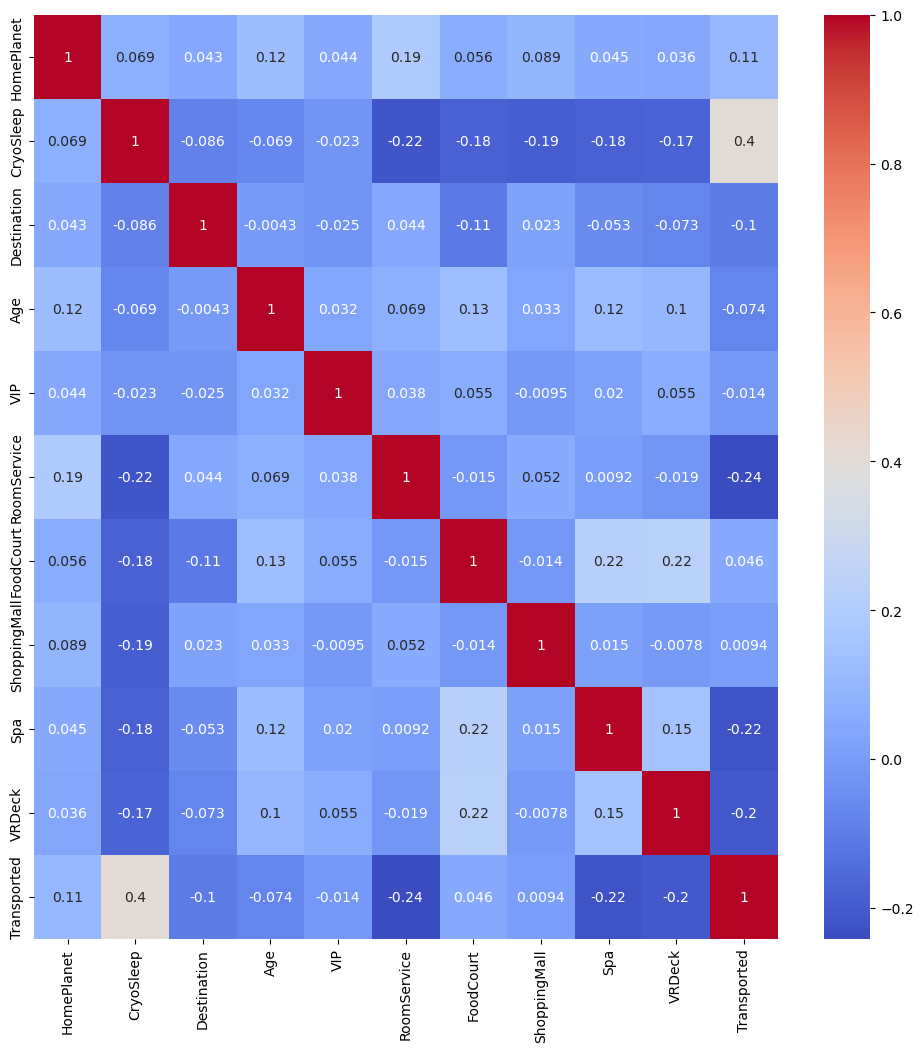

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 4. Feature Selection: Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(TARGET , axis =1 )
y = df[TARGET]
X_train , X_test , y_train , y_test = train_test_split(X , 
                                                       y, 
                                                       random_state = RANDOM_STATE,
                                                       test_size =0.2)

X_train.shape, X_test.shape

((6954, 10), (1739, 10))

## 5. Modeling

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

def evaluate(model, y_pred):
    plot_confusion_matrix(model, X_test, y_test)
    print(classification_report(y_test, y_pred))
    plot_roc_curve(model, X_test, y_test)

### 5.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
lgr_preds = lgr.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       885
           1       0.75      0.84      0.79       854

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.78      1739



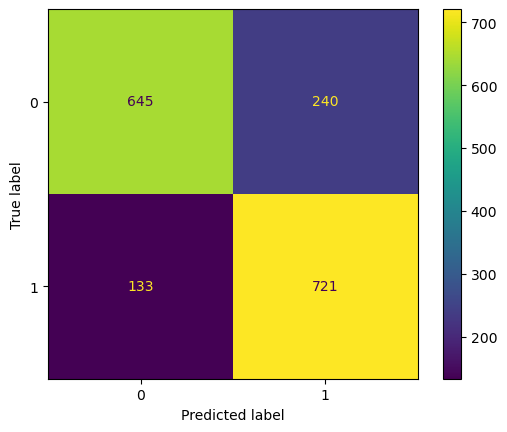

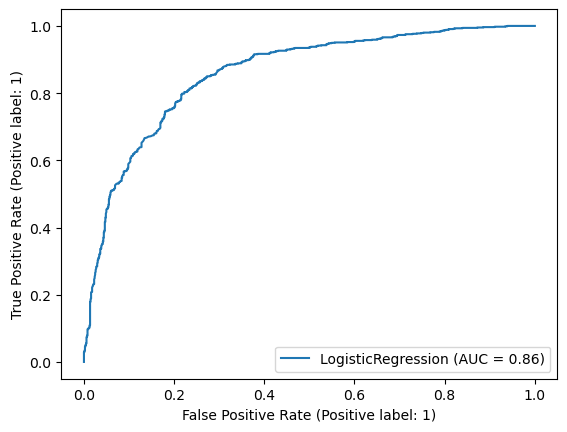

In [ ]:
evaluate(lgr, lgr_preds)

### 5.2 RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,max_leaf_nodes=16,n_jobs=-1)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       885
           1       0.78      0.80      0.79       854

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



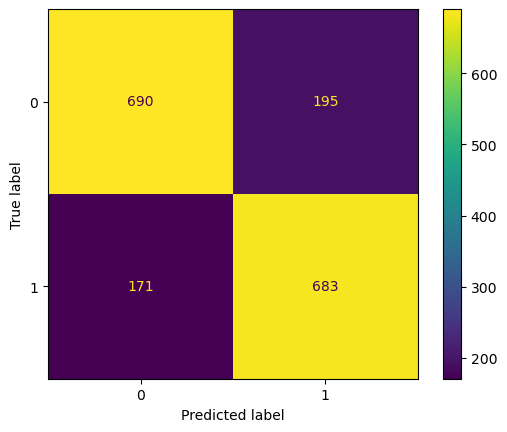

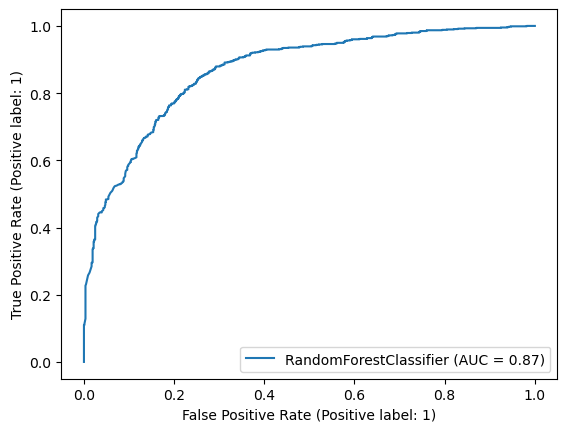

In [ ]:
evaluate(rf, rf_preds)

### 5.3 XGBoost

In [ ]:
%pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       885
           1       0.77      0.81      0.79       854

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



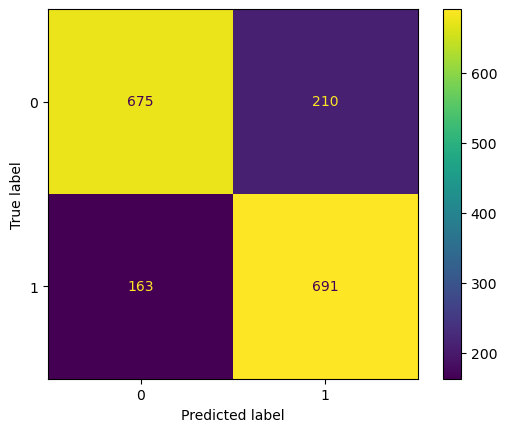

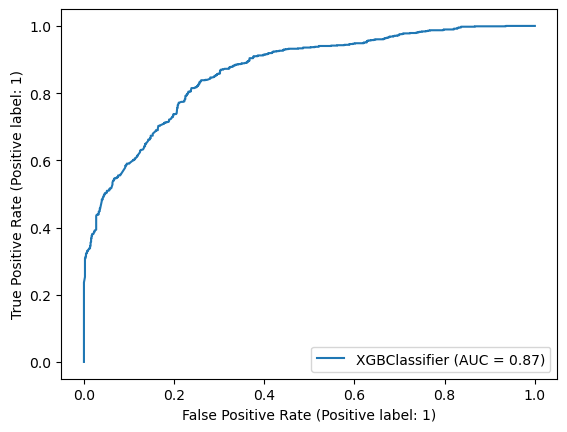

In [ ]:
evaluate(xgb, xgb_preds)

### 5.4 CatBoost

In [ ]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier()
cbc.fit(X_train, y_train, verbose=0)
cbc_preds = cbc.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       885
           1       0.78      0.83      0.80       854

    accuracy                           0.80      1739
   macro avg       0.80      0.80      0.80      1739
weighted avg       0.80      0.80      0.80      1739



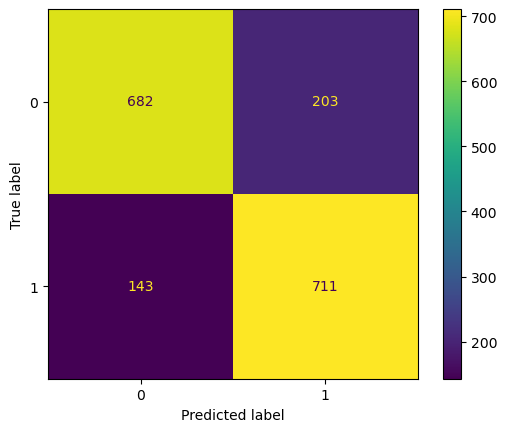

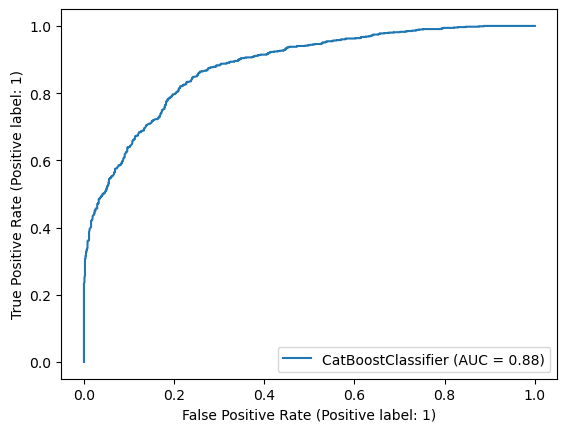

In [ ]:
evaluate(cbc, cbc_preds)